In [1]:
from google.colab import files
uploaded = files.upload()



Saving 000.png to 000.png
Saving 001.png to 001.png
Saving 002.png to 002.png


Images: ['000.png', '001.png', '002.png']
Masks: ['000_mask.png', '001_mask.png', '002_mask.png']
Loaded pair: 000.png + 000_mask.png
Loaded pair: 001.png + 001_mask.png
Loaded pair: 002.png + 002_mask.png
Total pairs: 3


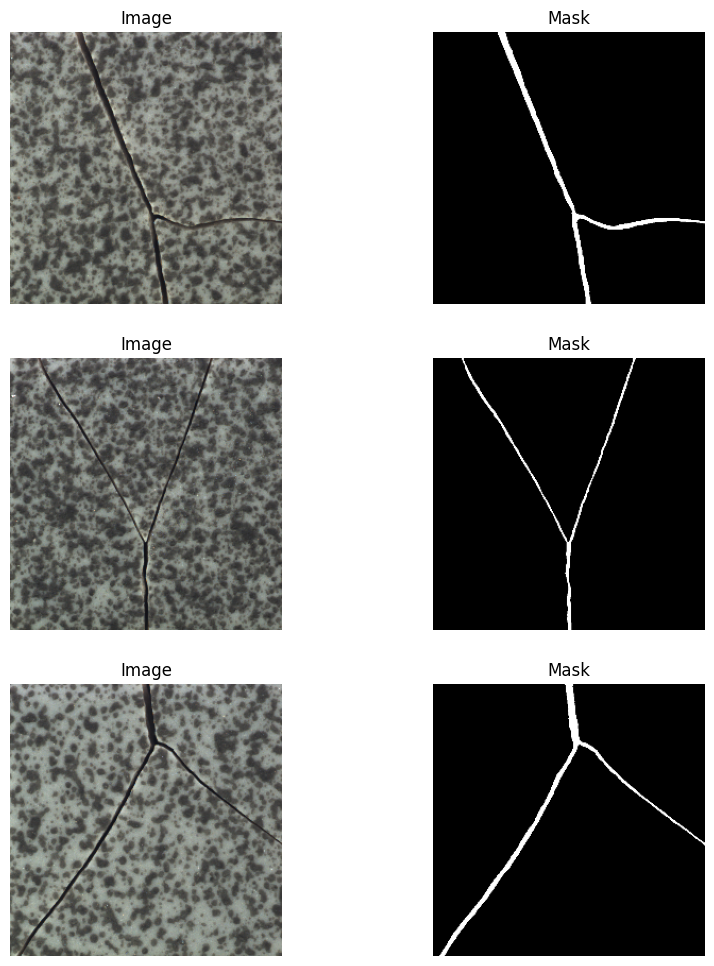

In [15]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = 256
IMAGE_DIR = "/content"

def load_and_preprocess(img_path, mask_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0

    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    mask = cv2.resize(mask, (IMG_SIZE, IMG_SIZE))
    mask = mask / 255.0
    mask = np.expand_dims(mask, axis=-1)

    return img, mask

---------------------

image_files = sorted([f for f in os.listdir(IMAGE_DIR) if f.endswith(".png") and "mask" not in f])
mask_files = sorted([f for f in os.listdir(IMAGE_DIR) if f.endswith("_mask.png")])

print("Images:", image_files)
print("Masks:", mask_files)

dataset = []

for img_file in image_files:
    base = img_file.replace(".png", "")            # 000
    mask_name = f"{base}_mask.png"                 # 000_mask.png
    mask_path = os.path.join(IMAGE_DIR, mask_name)
    img_path = os.path.join(IMAGE_DIR, img_file)

    if not os.path.exists(mask_path):
        print(f"⚠️ No mask for {img_file}")
        continue

    img, mask = load_and_preprocess(img_path, mask_path)
    dataset.append((img, mask))
    print(f"Loaded pair: {img_file} + {mask_name}")

print("Total pairs:", len(dataset))


# SHOW SAMPLES
def show_samples(dataset, n=3):
    plt.figure(figsize=(10, 4*n))
    for i in range(n):
        img, mask = dataset[i]

        plt.subplot(n, 2, 2*i + 1)
        plt.imshow(img)
        plt.title("Image")
        plt.axis("off")

        plt.subplot(n, 2, 2*i + 2)
        plt.imshow(mask.squeeze(), cmap="gray")
        plt.title("Mask")
        plt.axis("off")

    plt.show()

show_samples(dataset)
